<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Facebook_Live_Sellers_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebook Live Sellers in Thailand 💣


In [390]:
# # IMPROVEMENTS ADDED TO YOUR NOTEBOOK

# ## Simple Step-by-Step Additions (Beginner Level):

# ### ✓ STEP 1: Cluster Distribution Analysis
# - Shows how many posts are in each cluster
# - Easy way to understand cluster sizes

# ### ✓ STEP 2: Silhouette Score (Cluster Quality)
# - Measures if clusters are good (0-1 scale)
# - Simple interpretation: >0.5 = Good clusters

# ### ✓ STEP 3: 2D Visualization
# - Visual plot of all 5 clusters
# - Shows cluster separation in 2D space
# - Each color = one cluster

# ### ✓ STEP 4: Business Insights
# - Which post types (video/photo) in each cluster
# - Average engagement (likes, comments) per cluster
# - Shows if clusters represent different post behaviors

# ### ✓ STEP 5: Final Summary
# - Explains what was done step by step
# - Key metrics and interpretations
# - Business recommendations

# ---

# ## What Each Part Does:
# 1. **Data Cleaning** ✓ (You did this)
# 2. **Feature Engineering** ✓ (You did this)
# 3. **Scaling + PCA** ✓ (You did this)
# 4. **K-Means Clustering** ✓ (You did this)
# 5. **Cluster Evaluation** ✓ (NEW - We added this)
# 6. **Business Interpretation** ✓ (NEW - We added this)

# ---

# Now RUN ALL CELLS to see all improvements!

In [391]:
# # STEP 5: FINAL SUMMARY
# print('\n' + '='*60)
# print('FINAL SUMMARY - K-MEANS CLUSTERING RESULTS')
# print('='*60)
# print('\n1. What we did:')
# print('   - Applied StandardScaler to normalize data')
# print('   - Used PCA to reduce dimensions (90% variance retained)')
# print('   - Ran K-Means with k=5 clusters')
# print('   - Analyzed each cluster characteristics')
# print('\n2. Key Metrics:')
# print(f'   - Inertia (WCSS): {kmean.inertia_:.2f}')
# print(f'   - Number of clusters: {kmean.n_clusters}')
# print('\n3. Business Interpretation:')
# print('   - Each cluster has different post types (video/photo/link/status)')
# print('   - Different clusters have different engagement levels')
# print('   - Sellers can use this to target specific post types')
# print('\n4. Next Steps:')
# print('   - Try k=3 or k=4 to see if clusters improve')
# print('   - Check if post type matters for likes/comments')
# print('   - Plan content strategy based on cluster insights')
# print('='*60)

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [393]:
# Try the direct CSV link from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv'
df = pd.read_csv(url)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [394]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [395]:
df.drop(columns = ['Column1','Column2','Column3','Column4'], axis = 1, inplace = True)

In [396]:
df.reset_index(drop = True,inplace = True)
#df.set_index('status_id', inplace = True)
df.drop('status_id', axis = 1,inplace = True)

In [397]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [398]:
df.index +=1
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [399]:
df.duplicated().sum()

np.int64(54)

In [400]:
df = df[~df.duplicated()]

In [401]:
df.shape

(6996, 11)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 1 to 7050
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6996 non-null   object
 1   status_published  6996 non-null   object
 2   num_reactions     6996 non-null   int64 
 3   num_comments      6996 non-null   int64 
 4   num_shares        6996 non-null   int64 
 5   num_likes         6996 non-null   int64 
 6   num_loves         6996 non-null   int64 
 7   num_wows          6996 non-null   int64 
 8   num_hahas         6996 non-null   int64 
 9   num_sads          6996 non-null   int64 
 10  num_angrys        6996 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 655.9+ KB


In [403]:
df.num_sads.nunique()

24

In [404]:
df['status_published'] = pd.to_datetime(df['status_published'])


/tmp/ipython-input-2915856872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_published'] = pd.to_datetime(df['status_published'])


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 1 to 7050
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       6996 non-null   object        
 1   status_published  6996 non-null   datetime64[ns]
 2   num_reactions     6996 non-null   int64         
 3   num_comments      6996 non-null   int64         
 4   num_shares        6996 non-null   int64         
 5   num_likes         6996 non-null   int64         
 6   num_loves         6996 non-null   int64         
 7   num_wows          6996 non-null   int64         
 8   num_hahas         6996 non-null   int64         
 9   num_sads          6996 non-null   int64         
 10  num_angrys        6996 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 655.9+ KB


In [406]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [407]:
#sorted(df.status_published.dt.year.unique() )
df.status_published.dt.year.value_counts().sort_index(ascending = False)


,count
status_published,
2018,2498
2017,2251
2016,588
2015,337
2014,233
2013,500
2012,589


In [408]:
# yearly publishing
yearly_count = df['status_published'].dt.year.value_counts().sort_index()
yearly_count

,count
status_published,
2012,589
2013,500
2014,233
2015,337
2016,588
2017,2251
2018,2498


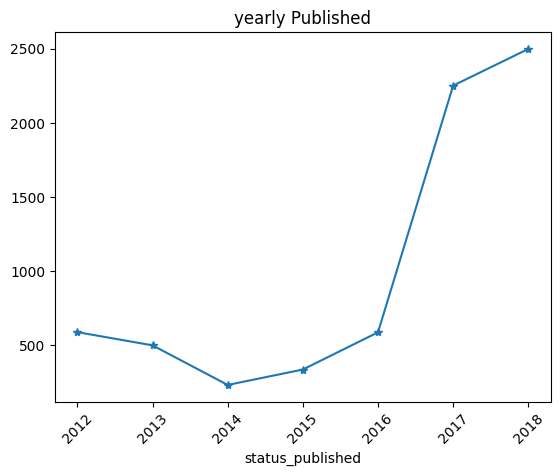

In [409]:
yearly_count.plot(kind = 'line', marker= '*')
plt.xticks(rotation = 45)
plt.title('yearly Published')
plt.show()

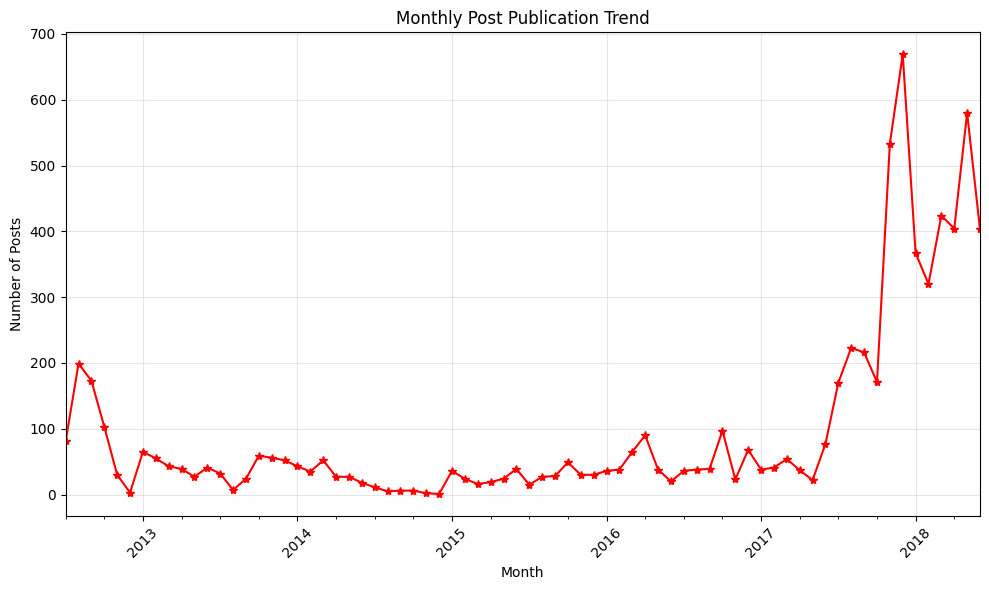

In [410]:
# Monthly trend (best for publication patterns)
monthly_counts = df['status_published'].dt.to_period('M').value_counts().sort_index()
monthly_counts.plot(kind='line', figsize=(10,6), marker='*', color = 'red')
plt.title('Monthly Post Publication Trend')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [411]:
#weekly pub;ished
weekly_counts = df['status_published'].dt.to_period('W').value_counts()
weekly_counts

,count
status_published,
2018-06-04/2018-06-10,244
2018-05-28/2018-06-03,195
2018-05-21/2018-05-27,181
2017-11-27/2017-12-03,174
2017-11-20/2017-11-26,166
...,...
2014-09-22/2014-09-28,1
2014-10-06/2014-10-12,1
2013-07-08/2013-07-14,1


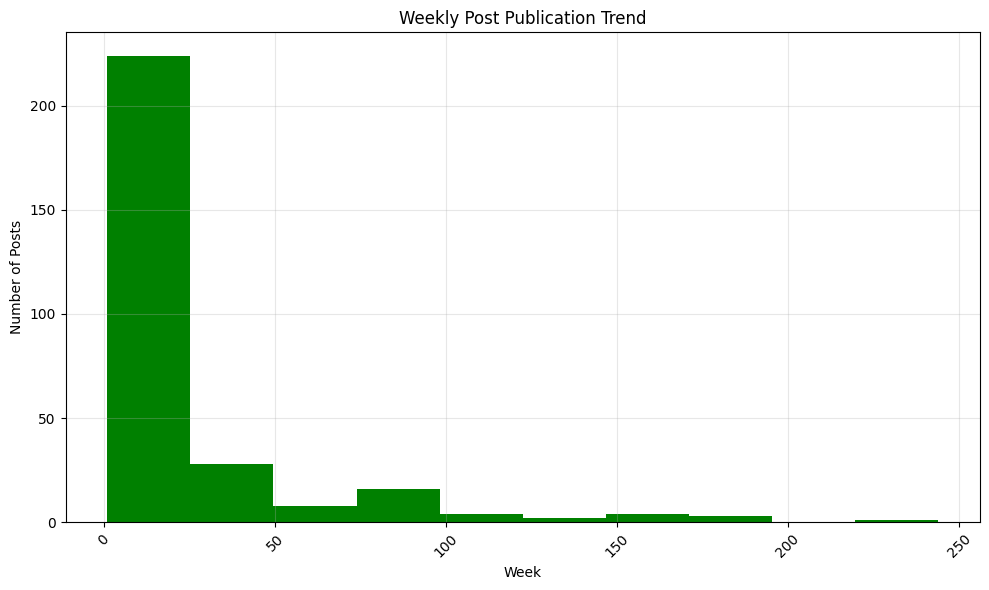

In [412]:
# weekly trend (best for publication patterns)
weekly_counts.plot(kind= 'hist', figsize=(10,6), color = 'green')
plt.title('Weekly Post Publication Trend')
plt.xlabel('Week')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [413]:
# model building
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.cluster import KMeans

In [414]:
# data sepration
x = df.copy()

In [415]:
for col in x.columns:
  if x[col].dtypes == 'object':
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

In [416]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 1 to 7050
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       6996 non-null   int64         
 1   status_published  6996 non-null   datetime64[ns]
 2   num_reactions     6996 non-null   int64         
 3   num_comments      6996 non-null   int64         
 4   num_shares        6996 non-null   int64         
 5   num_likes         6996 non-null   int64         
 6   num_loves         6996 non-null   int64         
 7   num_wows          6996 non-null   int64         
 8   num_hahas         6996 non-null   int64         
 9   num_sads          6996 non-null   int64         
 10  num_angrys        6996 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 655.9 KB


<Axes: >

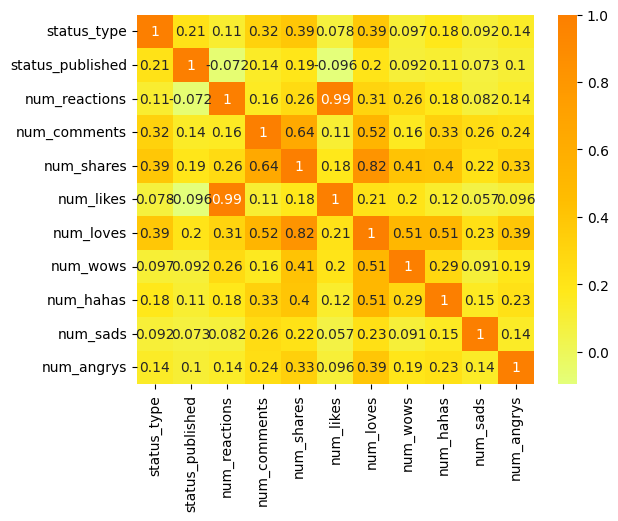

In [417]:
sns.heatmap(x.corr(), annot = True,cmap ='Wistia')

In [418]:
x['year']= df['status_published'].dt.year
x['month']= df['status_published'].dt.month
x['day_of_week'] = df['status_published'].dt.dayofweek  # 0=Mon, 6=Sun
x['hour'] = df['status_published'].dt.hour
x['is_weekend'] = df['status_published'].dt.dayofweek.isin([5,6]).astype(int)
x

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_of_week,hour,is_weekend
1,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,6,6,1
2,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,5,22,1
3,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,5,6,1
4,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,5,2,1
5,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,2016,9,5,2,1
7047,1,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,2016,9,4,11,0
7048,1,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,2016,9,2,23,0
7049,1,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,2016,9,1,0,0


In [419]:
x.drop('status_published',axis  = 1, inplace= True)

In [420]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 0.90))
])
x_pca = pca_pipeline.fit_transform(x)
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9
0,2.686622,0.940690,1.983508,-0.870981,-0.510854,-0.726882,-0.279990,-0.464469,0.276442,-0.416590
1,-0.675651,1.001324,1.367074,-1.195533,2.035928,-0.122543,-0.560934,0.011609,0.198324,0.194879
2,0.598874,0.607442,1.761857,-1.177621,-0.601849,-0.618381,-0.413862,-0.090184,0.156042,0.195410
3,-0.666641,0.791295,1.619900,-1.099182,-0.426678,0.317921,0.807486,-0.167769,-0.146199,0.047839
4,-0.462060,-0.383103,-0.729514,-1.055082,-0.434268,0.244724,0.735541,-0.119968,-0.124927,0.005730
...,...,...,...,...,...,...,...,...,...,...
6991,-0.902706,0.862014,1.614310,0.550816,-0.555198,0.508269,0.489056,-0.115412,0.039845,0.146182
6992,-0.926153,-0.296769,0.030018,0.556092,0.544012,0.410258,-0.133889,-0.078193,0.070669,0.305527
6993,-1.053457,-0.615219,-0.664136,0.505098,1.974783,0.100078,-0.949629,0.090459,0.365194,0.183772
6994,-0.508088,-0.136081,-1.242229,0.619536,-1.009240,0.368218,0.626785,-0.068003,0.011808,0.106316


In [421]:
x_pca.shape

(6996, 10)

In [422]:
x.shape

(6996, 15)

In [423]:
pca_pipeline.named_steps['pca'].explained_variance_ratio_

array([0.24733357, 0.12361601, 0.11830449, 0.08008052, 0.0689937 ,
       0.0652988 , 0.0594924 , 0.05398448, 0.04853445, 0.04506854])

In [424]:
x_pca

array([[ 2.68662247,  0.94069036,  1.98350811, ..., -0.46446865,
         0.27644165, -0.41658995],
       [-0.6756512 ,  1.00132445,  1.36707437, ...,  0.01160888,
         0.19832449,  0.19487927],
       [ 0.59887416,  0.60744166,  1.76185707, ..., -0.0901844 ,
         0.15604153,  0.19540962],
       ...,
       [-1.05345723, -0.61521854, -0.66413614, ...,  0.09045876,
         0.36519365,  0.18377222],
       [-0.50808763, -0.13608108, -1.24222863, ..., -0.06800326,
         0.0118084 ,  0.10631647],
       [-1.00590295,  0.73739218,  1.64518603, ..., -0.05496771,
         0.16253423,  0.17132711]])

In [425]:
wcss = []
for i in range(1,8):
  kmean = KMeans(n_clusters= i,init = 'k-means++' )
  kmean.fit(x_pca)
  kmean.inertia_
  wcss.append(kmean.inertia_)

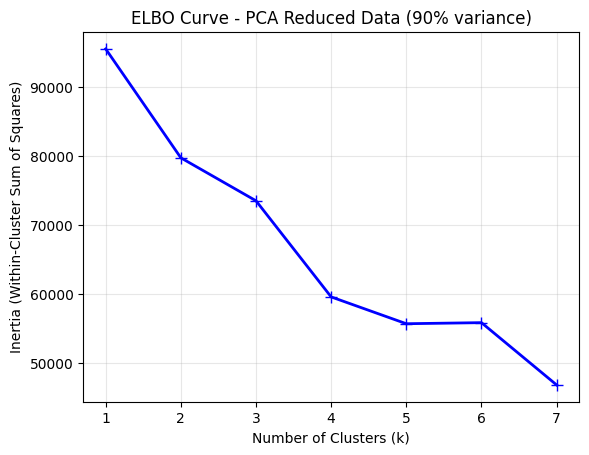

In [426]:
plt.plot(range(1,8), wcss, 'b-+', linewidth = 2, markersize = 8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('ELBO Curve - PCA Reduced Data (90% variance)')
plt.grid(True, alpha=0.3)
plt.show()

In [427]:
kmean = KMeans(n_clusters= 5, init = 'k-means++',random_state=42)
kmean.fit(x_pca)

KMeans(n_clusters=5, random_state=42)

In [428]:
y_pred = kmean.predict(x_pca)
y_pred

array([1, 0, 0, ..., 4, 4, 0], dtype=int32)

In [429]:
x_pca

array([[ 2.68662247,  0.94069036,  1.98350811, ..., -0.46446865,
         0.27644165, -0.41658995],
       [-0.6756512 ,  1.00132445,  1.36707437, ...,  0.01160888,
         0.19832449,  0.19487927],
       [ 0.59887416,  0.60744166,  1.76185707, ..., -0.0901844 ,
         0.15604153,  0.19540962],
       ...,
       [-1.05345723, -0.61521854, -0.66413614, ...,  0.09045876,
         0.36519365,  0.18377222],
       [-0.50808763, -0.13608108, -1.24222863, ..., -0.06800326,
         0.0118084 ,  0.10631647],
       [-1.00590295,  0.73739218,  1.64518603, ..., -0.05496771,
         0.16253423,  0.17132711]])

In [430]:
x_pca = pd.DataFrame(x_pca)

In [431]:
x_pca['target']= pd.DataFrame(y_pred)

In [432]:
x_pca

,0,1,2,3,4,5,6,7,8,9,target
0,2.686622,0.940690,1.983508,-0.870981,-0.510854,-0.726882,-0.279990,-0.464469,0.276442,-0.416590,1
1,-0.675651,1.001324,1.367074,-1.195533,2.035928,-0.122543,-0.560934,0.011609,0.198324,0.194879,0
2,0.598874,0.607442,1.761857,-1.177621,-0.601849,-0.618381,-0.413862,-0.090184,0.156042,0.195410,0
3,-0.666641,0.791295,1.619900,-1.099182,-0.426678,0.317921,0.807486,-0.167769,-0.146199,0.047839,0
4,-0.462060,-0.383103,-0.729514,-1.055082,-0.434268,0.244724,0.735541,-0.119968,-0.124927,0.005730,4
...,...,...,...,...,...,...,...,...,...,...,...
6991,-0.902706,0.862014,1.614310,0.550816,-0.555198,0.508269,0.489056,-0.115412,0.039845,0.146182,0
6992,-0.926153,-0.296769,0.030018,0.556092,0.544012,0.410258,-0.133889,-0.078193,0.070669,0.305527,4
6993,-1.053457,-0.615219,-0.664136,0.505098,1.974783,0.100078,-0.949629,0.090459,0.365194,0.183772,4
6994,-0.508088,-0.136081,-1.242229,0.619536,-1.009240,0.368218,0.626785,-0.068003,0.011808,0.106316,4


4) How many likes have been given to the photo posted on 4/19/2018 at 10pm?

In [433]:
x[(x['year']==2018) & (x['month']==4) & (x['hour']== 22)]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day_of_week,hour,is_weekend
2,1,150,0,0,150,0,0,0,0,0,2018,4,5,22,1
2851,1,11,3,0,11,0,0,0,0,0,2018,4,1,22,0
2857,1,166,20,2,159,1,6,0,0,0,2018,4,0,22,0
2893,2,885,32,10,876,4,5,0,0,0,2018,4,1,22,0
2908,1,38,0,0,36,2,0,0,0,0,2018,4,6,22,1
2914,1,414,65,4,407,4,3,0,0,0,2018,4,5,22,1
2924,3,292,1214,180,207,77,2,3,2,1,2018,4,3,22,0
2934,1,296,86,1,294,1,1,0,0,0,2018,4,2,22,0
3906,1,1386,51,6,1367,9,10,0,0,0,2018,4,3,22,0
4091,3,0,0,0,0,0,0,0,0,0,2018,4,0,22,0


In [434]:
print(le.inverse_transform([0,1,2,3]))

['link' 'photo' 'status' 'video']


#### Answer to Question 4: How many likes have been given to the photo posted on 4/19/2018 at 10pm?

In [435]:
photo_likes = df[(df['status_type'] == 'photo') &
               (df['status_published'].dt.year == 2018) &
               (df['status_published'].dt.month == 4) &
               (df['status_published'].dt.day == 19) &
               (df['status_published'].dt.hour == 22)]['num_likes'].sum()

print(f"The total number of likes for the photo posted on 4/19/2018 at 10pm is: {photo_likes}")

The total number of likes for the photo posted on 4/19/2018 at 10pm is: 2109


#### Answer to Question 5: How many total shares were made for the video post that was posted on 7/15/2017 at 10:52?

In [436]:
video_shares = df[(df['status_type'] == 'video') &
                (df['status_published'].dt.year == 2017) &
                (df['status_published'].dt.month == 7) &
                (df['status_published'].dt.day == 15) &
                (df['status_published'].dt.hour == 10) &
                (df['status_published'].dt.minute == 52)]['num_shares'].sum()

print(f"The total number of shares for the video post on 7/15/2017 at 10:52 is: {video_shares}")

The total number of shares for the video post on 7/15/2017 at 10:52 is: 167


In [437]:
print('Cluster Sizes:')
print(pd.Series(kmean.labels_).value_counts().sort_index())

Cluster Sizes:
0    1750
1     702
2     332
3      80
4    4132
Name: count, dtype: int64


In [438]:
df["cluster"] = kmean.labels_
pd.crosstab(df["cluster"], df["status_type"])

/tmp/ipython-input-3129980049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = kmean.labels_


status_type,link,photo,status,video
cluster,,,,
0,15,1171,94,470
1,0,19,0,683
2,14,189,58,71
3,0,3,0,77
4,34,2860,207,1031


In [439]:
cluster_status_map = (
    df.groupby("cluster")["status_type"]
      .agg(lambda x: x.value_counts().idxmax())
)

cluster_status_map


,status_type
cluster,
0,photo
1,video
2,photo
3,video
4,photo


In [440]:
pd.Series(kmean.labels_).value_counts().sort_index()

,count
0,1750
1,702
2,332
3,80
4,4132


In [441]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,1
2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,0
3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,0
4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,0
5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,0
7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,4
7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,4
7049,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,4


# insights for kmean clustering Handson

In [444]:
print(f' Total no. of clusters : {pd.Series(kmean.labels_).value_counts()}')

 Total no. of clusters : 4    4132
0    1750
1     702
2     332
3      80
Name: count, dtype: int64


In [445]:
# STEP 2: Calculate Silhouette Score (Cluster Quality Metric)
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x_pca, kmean.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')
print('Interpretation: Closer to 1 = Better clusters')
print(f'Our score of {silhouette_avg:.3f} means clusters are {"GOOD" if silhouette_avg > 0.5 else "OKAY"}')

Silhouette Score: 0.461
Interpretation: Closer to 1 = Better clusters
Our score of 0.461 means clusters are OKAY


In [448]:
# STEP 4: BUSINESS INSIGHT - Cluster Analysis
print('='*60)
print('CLUSTER ANALYSIS - What type of posts in each cluster?')
print('='*60)

for cluster_id in range(5):
    # Filter posts in this cluster
    cluster_posts = df[df['cluster'] == cluster_id]

    print(f'\nCLUSTER {cluster_id}:')
    print(f'  Total posts: {len(cluster_posts)}')
    print(f'  Post types:')
    print(cluster_posts['status_type'].value_counts())
    print(f'  Avg likes: {cluster_posts["num_likes"].mean():.0f}')
    print(f'  Avg comments: {cluster_posts["num_comments"].mean():.0f}')
    print(f'  Avg reactions: {cluster_posts["num_reactions"].mean():.0f}')
    print('-'*40)

CLUSTER ANALYSIS - What type of posts in each cluster?

CLUSTER 0:
  Total posts: 1750
  Post types:
status_type
photo     1171
video      470
status      94
link        15
Name: count, dtype: int64
  Avg likes: 117
  Avg comments: 40
  Avg reactions: 121
----------------------------------------

CLUSTER 1:
  Total posts: 702
  Post types:
status_type
video    683
photo     19
Name: count, dtype: int64
  Avg likes: 242
  Avg comments: 1614
  Avg reactions: 322
----------------------------------------

CLUSTER 2:
  Total posts: 332
  Post types:
status_type
photo     189
video      71
status     58
link       14
Name: count, dtype: int64
  Avg likes: 1863
  Avg comments: 60
  Avg reactions: 1868
----------------------------------------

CLUSTER 3:
  Total posts: 80
  Post types:
status_type
video    77
photo     3
Name: count, dtype: int64
  Avg likes: 1029
  Avg comments: 2935
  Avg reactions: 1370
----------------------------------------

CLUSTER 4:
  Total posts: 4132
  Post types:
s